In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load data 
data = pd.read_csv("bank-additional-full.csv", delimiter = ';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Deeper look at our dataset's features

age: Age of the client.

job: Type of job.

marital: Marital status.

education: Level of education.

default: Whether the client has credit in default.

balance: Average yearly balance in euros.

housing: Whether the client has a housing loan.

loan: Whether the client has a personal loan.

contact: Type of communication used for the last contact.

day: Last contact day of the month.

month: Last contact month of the year.

duration: Duration of the last contact in seconds.

campaign: Number of contacts performed during this campaign.

pdays: Number of days since the client was last contacted from a previous campaign.

previous: Number of contacts performed before this campaign.

poutcome: Outcome of the previous marketing campaign.

y: Target variable (whether the client subscribed to a term deposit).

In [2]:
# Check for 'unknown' values and NA
print("Missing values:")
print(data.isna().sum())
print("\nUnknown values per column:")
print((data == 'unknown').sum())


Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Unknown values per column:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


No missing data in the dataset,there are presence of unknown values in the columns; job,marital,education,default,housing and loan

In [3]:
#handle unknown values
# Replace 'unknown' with NaN for better handling
data.replace('unknown', np.nan, inplace=True)

In [4]:
#check first row of each column
data.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
month                     may
day_of_week               mon
duration                  261
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp.var.rate              1.1
cons.price.idx         93.994
cons.conf.idx           -36.4
euribor3m               4.857
nr.employed            5191.0
y                          no
Name: 0, dtype: object

In [5]:
#check for shape
data.shape

(41188, 21)

In [6]:
#check for duplicates
data.duplicated().sum()

12

In [7]:
#remove duplicates
data.drop_duplicates(keep = 'first', inplace = True)
print(data.duplicated().sum())
print(data.shape)

0
(41176, 21)


In [8]:
#drop duration column
data.drop('duration', axis = 1, inplace = True)

In [9]:
#check metadata
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             40846 non-null  object 
 2   marital         41096 non-null  object 
 3   education       39446 non-null  object 
 4   default         32580 non-null  object 
 5   housing         40186 non-null  object 
 6   loan            40186 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  campaign        41176 non-null  int64  
 11  pdays           41176 non-null  int64  
 12  previous        41176 non-null  int64  
 13  poutcome        41176 non-null  object 
 14  emp.var.rate    41176 non-null  float64
 15  cons.price.idx  41176 non-null  float64
 16  cons.conf.idx   41176 non-null  float64
 17  euribor3m       41176 non-null  floa

In [10]:
print(data['y'].unique())

['no' 'yes']


In [11]:
#Convert target variable to binary
data['y'] = data['y'].map({'no': 0, 'yes': 1})

In [12]:
# #Convert categorical variables to dummy variables
# cat_cols = data.select_dtypes(include='object').columns
# data = pd.get_dummies(data, columns=cat_cols, drop_first=True)

In [13]:
#check descriptive statistics of the dataset
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,0.112663
std,10.42068,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,0.316184
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Customers above 90 years old are rare and may be outliers. We will consider capping or treating them separately in models.

While most customers are contacted 1–3 times, some were contacted over 50 times. These are likely outliers that can skew model performance.

A value of 999 means the customer was never contacted before. This is a placeholder, not a real number. It should be replaced with a flag variable (e.g., was_previously_contacted).

Most customers had no previous contact. This feature is highly skewed and may work better as a binary or categorical variable.


In [14]:
#check for and handle outliers
numeric_cols = data.select_dtypes(include='number').columns

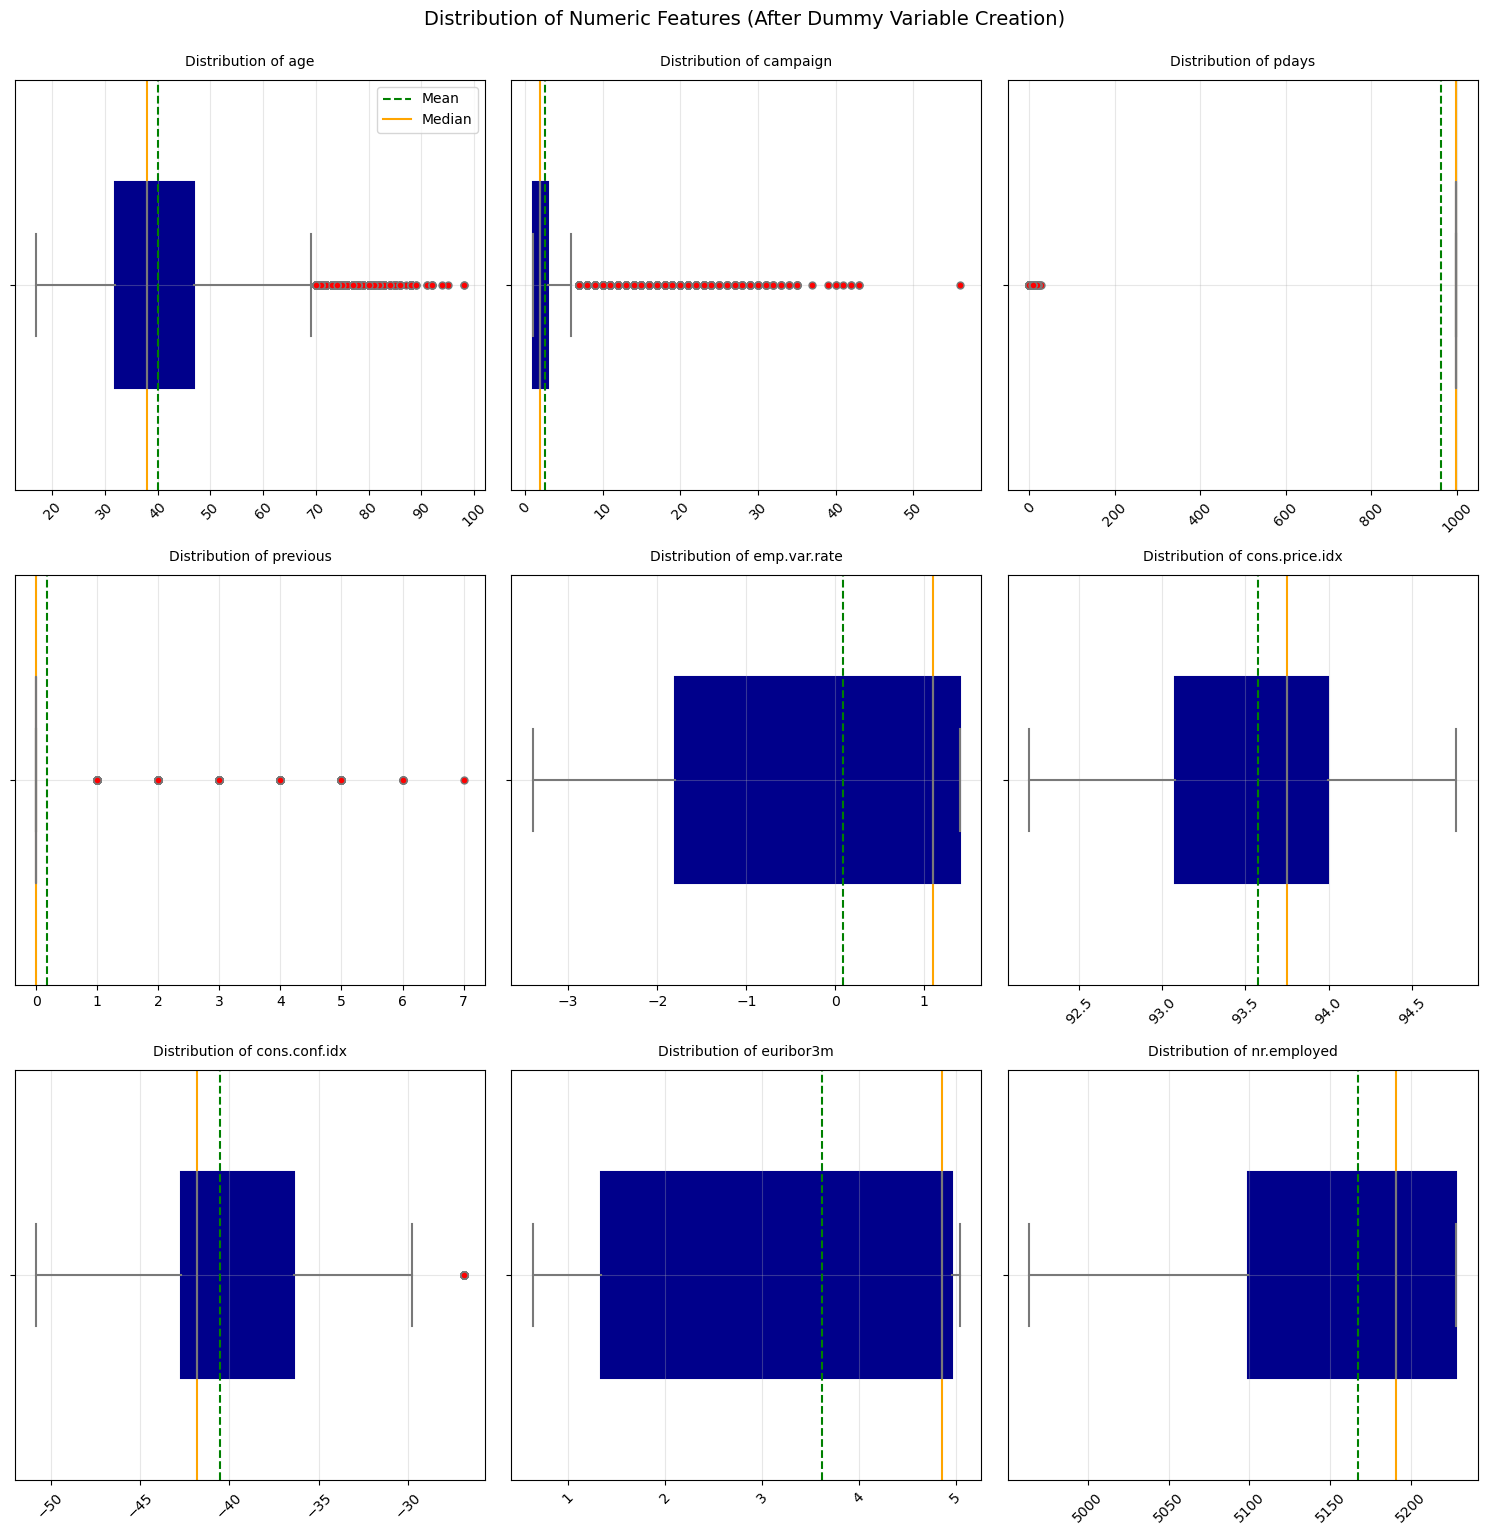


Summary Statistics for Numeric Features:
                  count         mean         std       min       25%  \
cons.conf.idx   41176.0   -40.502863    4.627860   -50.800   -42.700   
emp.var.rate    41176.0     0.081922    1.570883    -3.400    -1.800   
previous        41176.0     0.173013    0.494964     0.000     0.000   
campaign        41176.0     2.567879    2.770318     1.000     1.000   
euribor3m       41176.0     3.621293    1.734437     0.634     1.344   
age             41176.0    40.023800   10.420680    17.000    32.000   
cons.price.idx  41176.0    93.575720    0.578839    92.201    93.075   
pdays           41176.0   962.464810  186.937102     0.000   999.000   
nr.employed     41176.0  5167.034870   72.251364  4963.600  5099.100   

                     50%       75%       max  
cons.conf.idx    -41.800   -36.400   -26.900  
emp.var.rate       1.100     1.400     1.400  
previous           0.000     0.000     7.000  
campaign           2.000     3.000    56.000  
eu

In [15]:
# Select only numeric columns (excluding the target and any non-numeric columns)
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('y', errors='ignore')  # Exclude target if present

# Calculate grid dimensions
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Ceiling division

# Create figure with dynamic size based on number of rows
plt.figure(figsize=(15, 5*n_rows))

# Create boxplots for each numeric column
for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Customize boxplot appearance
    boxprops = dict(linestyle='-', linewidth=1.5, color='darkblue')
    flierprops = dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none')
    
    sns.boxplot(x=data[col], 
                color='lightblue', 
                width=0.5,
                boxprops=boxprops,
                flierprops=flierprops)
    
    # Add mean line
    plt.axvline(data[col].mean(), color='green', linestyle='--', linewidth=1.5, label='Mean')
    
    # Add median line (already in boxplot but making it more visible)
    plt.axvline(data[col].median(), color='orange', linestyle='-', linewidth=1.5, label='Median')
    
    plt.title(f'Distribution of {col}', fontsize=10, pad=10)
    plt.xlabel('')
    plt.grid(True, alpha=0.3)
    
    # Add legend for first subplot only
    if i == 0:
        plt.legend()
    
    # Rotate x-axis labels if needed
    if len(data[col].unique()) > 10:
        plt.xticks(rotation=45)

plt.tight_layout()
plt.suptitle('Distribution of Numeric Features (After Dummy Variable Creation)', y=1.02, fontsize=14)
plt.show()

# Additional: Show summary statistics for numeric columns
print("\nSummary Statistics for Numeric Features:")
print(data[numeric_cols].describe().T.sort_values(by='mean'))

In [16]:
#checking statistics of outlier features

data[['age', 'pdays', 'campaign', 'previous']].describe()

,age,pdays,campaign,previous
count,41176.00000,41176.000000,41176.000000,41176.000000
mean,40.02380,962.464810,2.567879,0.173013
std,10.42068,186.937102,2.770318,0.494964
min,17.00000,0.000000,1.000000,0.000000
25%,32.00000,999.000000,1.000000,0.000000
50%,38.00000,999.000000,2.000000,0.000000
75%,47.00000,999.000000,3.000000,0.000000
max,98.00000,999.000000,56.000000,7.000000


In [17]:
len(data[data['pdays'] == 999]) / len(data) * 100


96.32067223625413

96.32% is the percentage of clients who weren't contacted before the current campaign

In [18]:
# Binary feature for column pdays: contacted before or not
data['contacted_before'] = np.where(data['pdays'] == 999, 0, 1)

# Optional: replace 999 with NaN if you want to use it in modeling
data['pdays_clean'] = data['pdays'].replace(999, np.nan)


In [19]:
#use capping for column previous
data['previous_capped'] = np.where(data['previous'] > 3, 3, data['previous'])


In [20]:
len(data[data['campaign'] > 20]) / len(data) * 100

0.38129007188653585

A very small fraction (0.38%) of clients received >20 contacts, which might indicate:

Data entry errors (unrealistically high values)

Aggressive marketing tactics (possible harassment risk)

Special cases (e.g., high-value clients receiving extra follow-ups)

In [21]:
len(data[data['campaign'] > 7])

1777

In [22]:
# Calculate conversion rates
normal = data[data['campaign'] <= 7]
excessive = data[data['campaign'] > 7]

print(f"Conversion rate (≤7 contacts): {normal['y'].mean()*100:.2f}%")
print(f"Conversion rate (>7 contacts): {excessive['y'].mean()*100:.2f}%")

Conversion rate (≤7 contacts): 11.59%
Conversion rate (>7 contacts): 4.11%


Clients contacted ≤7 times convert at 11.59%

Clients contacted >7 times convert at 4.11% (65% lower!)

This suggests over-contacting hurts conversions.

Actionable Recommendation is using 

**1.Strategic Capping**

In [23]:
# Remove customers who were contacted more than 7 times
capped_data = data[data['campaign'] <= 7]

# Recalculate overall conversion under the capped policy
capped_overall_conv = capped_data['y'].mean()
print(f"Overall conversion after capping at 7: {capped_overall_conv*100:.2f}%")


Overall conversion after capping at 7: 11.59%


After Strategic Capping, the maximum value has now become 7



**2.Winsorization**

In [24]:
# Set your thresholds (e.g., 1st and 99th percentiles)
lower_limit = data['campaign'].quantile(0.01)
upper_limit = data['campaign'].quantile(0.99)

# Winsorize: Replace extreme values with thresholds
data['campaign_winsorized'] = np.clip(data['campaign'], lower_limit, upper_limit)

# Optional: Compare before and after
print(f"Original Max: {data['campaign'].max()} → Winsorized Max: {data['campaign_winsorized'].max()}")




Original Max: 56 → Winsorized Max: 14


In [25]:
data.to_csv("bank_marketing_cleaned.csv", index=False)
